# **Taxi 🚕 Data** 📊
## Loading CSV file. 



In [275]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np



# Define the ZIP file name
zip_file_name = 'Yellow_Taxi_Assignment.csv.zip'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_name, 'r') as zip_file:
    # Assuming there is only one CSV file in the ZIP archive
    csv_file_name = zip_file.namelist()[0]
    zip_file.extract(csv_file_name)

# Define the date columns that you want to parse as datetime objects
date_columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']

# Read the extracted CSV file using pandas with date parsing
df_ny = pd.read_csv(csv_file_name, parse_dates=date_columns)
df_CPI = pd.read_csv('CPIAUCSL.csv')
# Output 
df_ny.info()
df_ny.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304978 entries, 0 to 304977
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               304978 non-null  int64         
 1   tpep_pickup_datetime   304978 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  304978 non-null  datetime64[ns]
 3   passenger_count        295465 non-null  float64       
 4   trip_distance          304978 non-null  float64       
 5   RatecodeID             295465 non-null  float64       
 6   store_and_fwd_flag     295465 non-null  object        
 7   PULocationID           304978 non-null  int64         
 8   DOLocationID           304978 non-null  int64         
 9   payment_type           304978 non-null  int64         
 10  fare_amount            304978 non-null  float64       
 11  extra                  304978 non-null  float64       
 12  mta_tax                304978 non-null  floa

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.0,0.53,1.0,N,142,163,1,3.5,0.0,0.5,1.29,0.0,0.3,5.59,NaN,NaN
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.0,1.05,1.0,N,140,236,1,6.0,0.0,0.5,1.02,0.0,0.3,7.82,NaN,NaN
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.0,1.83,1.0,N,211,158,1,9.5,0.5,0.5,1.62,0.0,0.3,12.42,NaN,NaN
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.0,2.30,1.0,N,249,4,2,10.0,0.0,0.5,0.00,0.0,0.3,10.80,NaN,NaN
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.0,3.06,1.0,N,186,142,1,12.5,0.5,0.5,1.00,0.0,0.3,14.80,NaN,NaN


## Data Cleaning & Imputation

We can see from teh Data Frame info that there are 5 columns with null values.  

1.- **We will remove values from the following fields:**
| Field                | Count |
|----------------------|-------|
| passenger_count      | 9513  |
| RatecodeID           | 9513  |
| store_and_fwd_flag   | 9513  |

Because there can not be a Taxi trip without passanger. 

In [276]:
# Remove rows with missing values in specific columns
columns_to_check = ['passenger_count', 'RatecodeID', 'store_and_fwd_flag']
# Dropping the specific values
df_ny.dropna(subset=columns_to_check, inplace=True)
# The new number of rows
print(f"The number of rows is {df_ny.shape[0]}")




The number of rows is 295465


2.- **Nulls in columns `airport_fee` and `congestion_surcharge` I will treat differently.** Now that the rides with no passangers have been remove we will look into columns `airport_fee` and `congestion_surcharge` for cleaning or imputation. The unique values are:

In [277]:
unique_airport_fees = df_ny['airport_fee'].unique()
unique_congestion_surcharges = df_ny['congestion_surcharge'].unique()

print("Unique values in 'airport_fee':")
print(unique_airport_fees)

print("\nUnique values in 'congestion_surcharge':")
print(unique_congestion_surcharges)

Unique values in 'airport_fee':
[  nan  0.    1.25 -1.25]

Unique values in 'congestion_surcharge':
[  nan  0.    2.5  -2.5   2.75  0.5 ]


This are the definitions comming from the db explanations. 

| `airport_fee` : $1.25 for pick up only at LaGuardia and John F. Kennedy Airports. | 
----
| **`congestion_surcharge` : Total amount collected in trip for NYS congestion surcharge.**| 



Following the definitions I will change the negative values to positive and replace the nan for 0. values.
when `airport_fee` is negative then multiply for -1. if `airport_fee` is nan remplace by 0. 

In [278]:
# First, fill NaN values in 'airport_fee' with 0
df_ny['airport_fee'].fillna(0, inplace=True)
df_ny['congestion_surcharge'].fillna(0, inplace=True)
# Then, replace negative values in 'airport_fee' with their absolute values
df_ny['airport_fee'] = df_ny['airport_fee'].apply(lambda x: abs(x) if x < 0 else x)
df_ny['congestion_surcharge'] = df_ny['congestion_surcharge'].apply(lambda x: abs(x) if x < 0 else x)

unique_airport_fees = df_ny['airport_fee'].unique()
unique_congestion_surcharges = df_ny['congestion_surcharge'].unique()

print("Unique values in 'airport_fee':")
print(unique_airport_fees)

print("\nUnique values in 'congestion_surcharge':")
print(unique_congestion_surcharges)

print(f"The number of rows is {df_ny.shape[0]}")

Unique values in 'airport_fee':
[0.   1.25]

Unique values in 'congestion_surcharge':
[0.   2.5  2.75 0.5 ]
The number of rows is 295465


Now all values are fitting the description in the data dictionary pdf. 

## Feature Engeneering  

Creating variable of trip duration in seconds because of its a granularity

In [279]:
df_ny["trip_duration_seconds"] = (df_ny["tpep_dropoff_datetime"] - df_ny["tpep_pickup_datetime"]).astype('timedelta64[s]')

Creating Daytime flag

In [280]:
#Creating flag with daytime 
df_ny['rushhour_flag'] = (df_ny["tpep_pickup_datetime"].dt.hour >= 7) & (df_ny["tpep_pickup_datetime"].dt.hour <= 10) | (df_ny["tpep_pickup_datetime"].dt.hour >= 16) & (df_ny["tpep_pickup_datetime"].dt.hour <= 19)
df_ny['rushhour_flag'] = pd.Categorical(df_ny['rushhour_flag'])

Creating a Categorical Value for Day of the Week 

In [281]:
# Creating Ctegorical Variable with day of the week. 
df_ny["pickup_weekday"] = df_ny["tpep_pickup_datetime"].dt.dayofweek
df_ny["pickup_weekday"] = pd.Categorical(df_ny["pickup_weekday"] )

Creatring varaibles Month to form time series. 

In [282]:
df_ny["month_of_trip"] = df_ny["tpep_pickup_datetime"].dt.strftime('%b-%y')

Removing trips with distance 0 because a taxi trip involves some distance. Also removing trip with duration under or equal to 0.

In [283]:
df_ny = df_ny.loc[(df_ny['trip_distance'] > 0)]
df_ny = df_ny.loc[df_ny['trip_duration_seconds'] > pd.Timedelta(seconds=0)]

The new db looks like this:

In [284]:
df_ny.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291800 entries, 0 to 304977
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               291800 non-null  int64         
 1   tpep_pickup_datetime   291800 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  291800 non-null  datetime64[ns]
 3   passenger_count        291800 non-null  float64       
 4   trip_distance          291800 non-null  float64       
 5   RatecodeID             291800 non-null  float64       
 6   store_and_fwd_flag     291800 non-null  object        
 7   PULocationID           291800 non-null  int64         
 8   DOLocationID           291800 non-null  int64         
 9   payment_type           291800 non-null  int64         
 10  fare_amount            291800 non-null  float64       
 11  extra                  291800 non-null  float64       
 12  mta_tax                291800 non-null  float64  

The final table is looking like this:

In [285]:
df_ny.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration_seconds,rushhour_flag,pickup_weekday,month_of_trip
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.0,0.53,1.0,N,142,163,1,...,1.29,0.0,0.3,5.59,0.0,0.0,0 days 00:02:04,False,0,Jan-18
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.0,1.05,1.0,N,140,236,1,...,1.02,0.0,0.3,7.82,0.0,0.0,0 days 00:04:41,False,0,Jan-18
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.0,1.83,1.0,N,211,158,1,...,1.62,0.0,0.3,12.42,0.0,0.0,0 days 00:11:04,False,0,Jan-18
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.0,2.30,1.0,N,249,4,2,...,0.00,0.0,0.3,10.80,0.0,0.0,0 days 00:09:46,True,0,Jan-18
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.0,3.06,1.0,N,186,142,1,...,1.00,0.0,0.3,14.80,0.0,0.0,0 days 00:13:57,False,0,Jan-18


## Exploratory Data Analysis. 
In this section I try to give a "Forest" view of the data. I will show two most important time series describing the data. The number of passangers and the overall amount payed. 


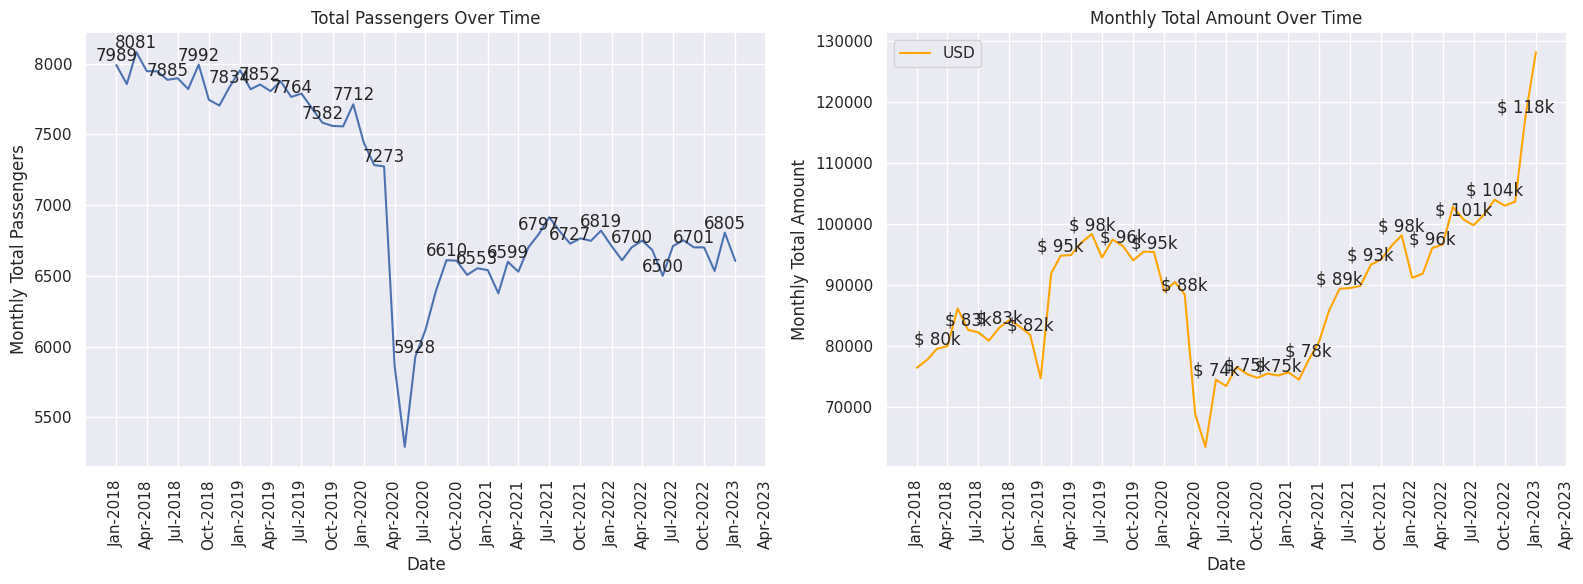

In [293]:


# Group by the formatted_pickup_date and sum the passenger_count
monthly_passenger_count = df_ny.groupby('month_of_trip')['passenger_count'].sum().reset_index()
monthly_passenger_count['month_of_trip'] = pd.to_datetime(monthly_passenger_count['month_of_trip'], format='%b-%y')
monthly_passenger_count.sort_values(by='month_of_trip', inplace=True)

# Group by the formatted_pickup_date and sum the total_amount
monthly_amount = df_ny.groupby('month_of_trip')['total_amount'].sum().reset_index()
monthly_amount['month_of_trip'] = pd.to_datetime(monthly_amount['month_of_trip'], format='%b-%y')
monthly_amount.sort_values(by='month_of_trip', inplace=True)

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the passenger count data in the first subplot
axs[0].plot(monthly_passenger_count['month_of_trip'], monthly_passenger_count['passenger_count'])
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Monthly Total Passengers')
axs[0].set_title('Total Passengers Over Time')
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axs[0].tick_params(axis='x', rotation=90)


# Annotate data points with number labels at 3-month intervals and the first month
for x, y in zip(monthly_passenger_count['month_of_trip'], monthly_passenger_count['passenger_count']):
    if x.month % 3 == 0 or (x.month == 1 and x.year == 2018):
        axs[0].text(x, y, f'{int(y)}', ha='center', va='bottom')

# Plot the total amount data in the second subplot
axs[1].plot(monthly_amount['month_of_trip'], monthly_amount['total_amount'], label='USD', color='orange')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Monthly Total Amount')
axs[1].set_title('Monthly Total Amount Over Time')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axs[1].tick_params(axis='x', rotation=90)

# Annotate data points with number labels at 3-month intervals
for x, y in zip(monthly_amount['month_of_trip'], monthly_amount['total_amount']):
    if x.month % 3 == 0:
        axs[1].text(x, y, f'$ {y/1000:.0f}k', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.legend()
plt.show()


The passenger count data demonstrates a consistent and substantial decline in ridership, with an estimated -15% decrease from early 2018 to 2023. Notably, the dataset highlights a significant drop in passenger numbers during the COVID-19 pandemic, underscoring the pandemic's profound impact on transportation, resulting in the lowest ridership levels. The amount payed nontheless shows a steap increase. Which generates more questions regarding how is this increase possible. 

Does the distance increased over time or the amount of time spent in the taxi increased over time ? 

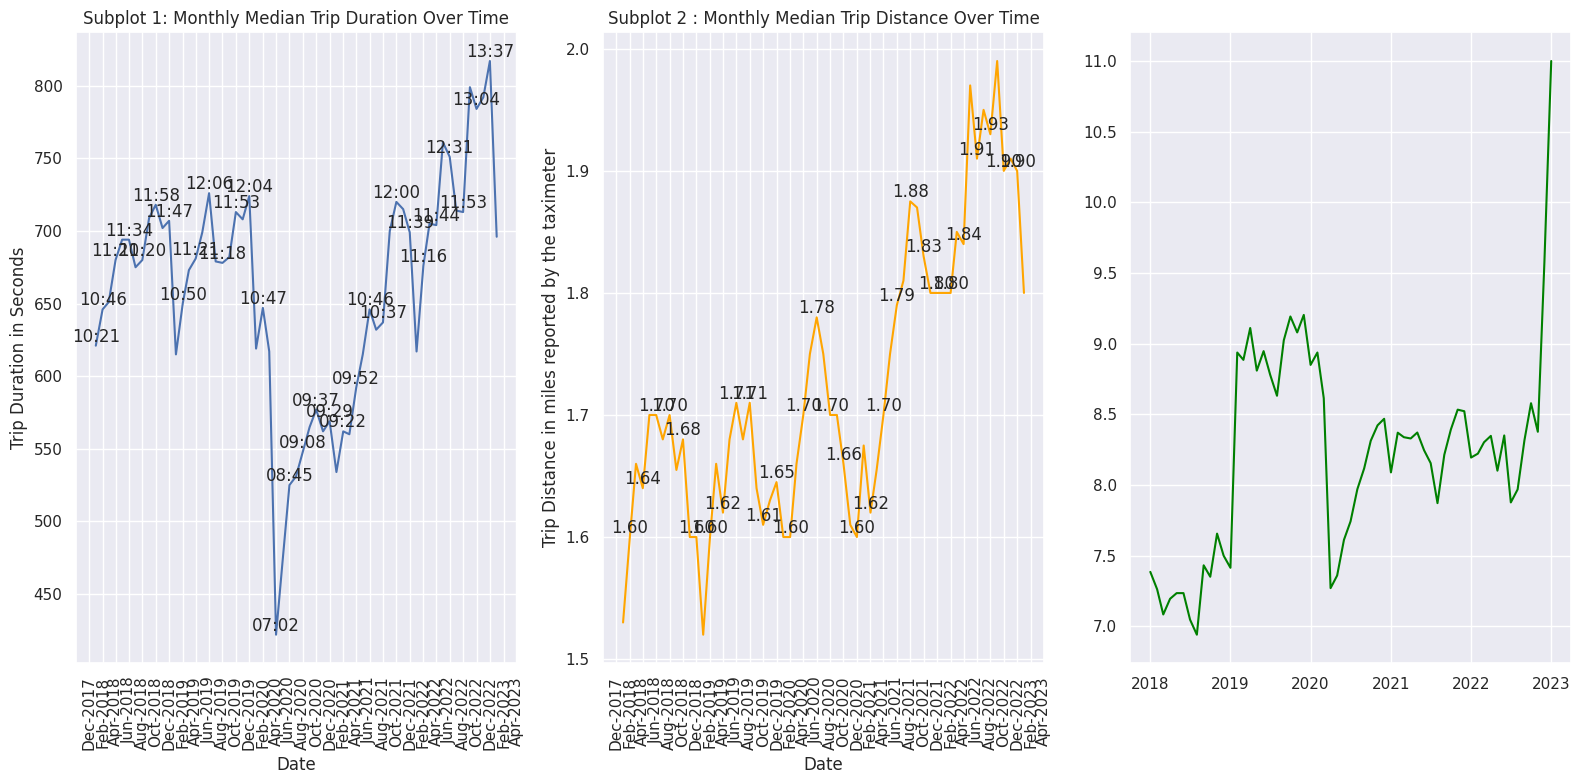

In [287]:
avg_monthly_trip_duration = df_ny.groupby('month_of_trip')['trip_duration_seconds'].median().reset_index()
avg_monthly_trip_duration['month_of_trip'] = pd.to_datetime(avg_monthly_trip_duration['month_of_trip'], format='%b-%y')
avg_monthly_trip_duration.sort_values(by='month_of_trip', inplace=True)

avg_monthly_distance = df_ny.groupby('month_of_trip')['trip_distance'].median().reset_index()
avg_monthly_distance['month_of_trip'] = pd.to_datetime(avg_monthly_distance['month_of_trip'], format='%b-%y')
avg_monthly_distance.sort_values(by='month_of_trip', inplace=True)



combined = pd.merge(monthly_amount,avg_monthly_distance, on='month_of_trip', suffixes=('_total_amount', '_trip_distance')) 
combined['amount_per_mile'] = combined['total_amount']/combined['trip_distance']

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(16, 8))

axs[1].plot(avg_monthly_distance['month_of_trip'], avg_monthly_distance['trip_distance'],color='orange')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Trip Distance in miles reported by the taximeter')
axs[1].set_title('Subplot 2 : Monthly Median Trip Distance Over Time')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=2))
axs[1].tick_params(axis='x', rotation=90)

# Annotate data points with number labels at 3-month intervals
for x, y in zip(avg_monthly_distance['month_of_trip'], avg_monthly_distance['trip_distance']):
    if x.month % 2 == 0:
        axs[1].text(x, y, f'{y:.2f}', ha='center', va='bottom')

axs[0].plot(avg_monthly_trip_duration['month_of_trip'], avg_monthly_trip_duration['trip_duration_seconds'])
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Trip Duration in Seconds')
axs[0].set_title('Subplot 1: Monthly Median Trip Duration Over Time')
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=2))
axs[0].tick_params(axis='x', rotation=90)

# Annotate data points with labels in minutes:seconds format at 3-month intervals and the first month
for z, w in zip(avg_monthly_trip_duration['month_of_trip'], avg_monthly_trip_duration['trip_duration_seconds']):
    if z.month % 2 == 0 or (z.month == 1 and z.year == 2018):
        if isinstance(w, pd.Timedelta):  # Use isinstance to check if it's a Timedelta
            total_seconds = int(w.total_seconds())
        else:
            total_seconds = int(w)
        minutes = total_seconds // 60
        seconds = total_seconds % 60
        annotation_text = f'{minutes:02d}:{seconds:02d}'  # Format as mm:ss
        axs[0].text(z, total_seconds, annotation_text, ha='center', va='bottom')

axs[2].plot(combined['month_of_trip'], combined['amount_per_mile'],color='green')

# Show the plot
plt.tight_layout()
plt.show()



From 01.01.2018 untill 31.01.2023 there is an increase in the median distance per ride in 19% from 1.51 to 1.40. 

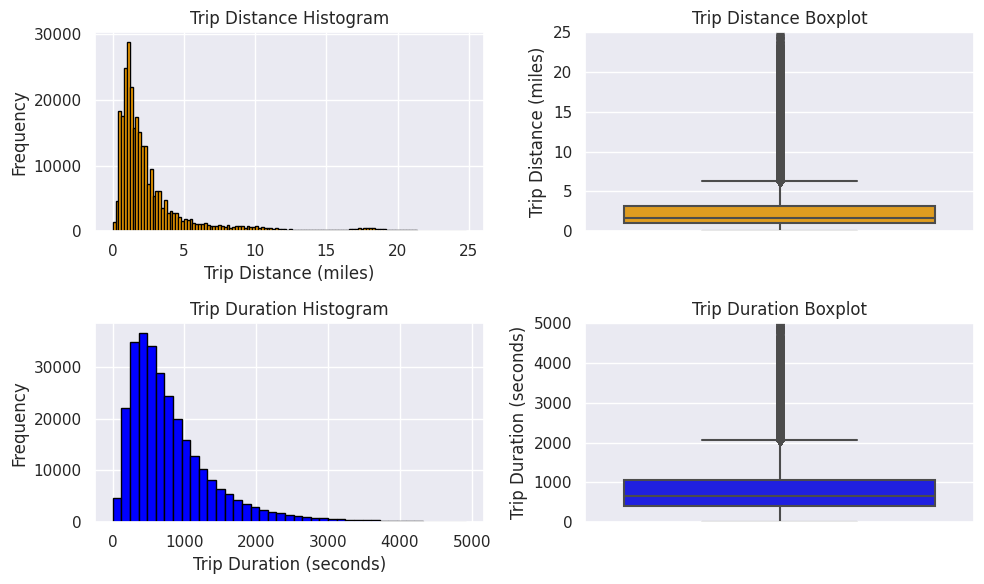

In [288]:

df_ny["trip_duration_seconds"] = pd.to_numeric(df_ny["trip_duration_seconds"], errors='coerce')

# Create a figure with two subplots: one for the histogram and one for the boxplot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))

# Create a histogram
ax1.hist(df_ny["trip_distance"], bins=np.arange(0, 25, 0.2), color='orange', edgecolor='black')

# Create a histogram
ax3.hist(df_ny["trip_duration_seconds"], bins=np.arange(0, 5000, 120), color='blue', edgecolor='black')

# Set labels and title for the histogram
ax1.set_xlabel('Trip Distance (miles)')
ax1.set_ylabel('Frequency')
ax1.set_title('Trip Distance Histogram')

# Create a boxplot for trip_distance
sns.boxplot(y=df_ny["trip_distance"], ax=ax2, color='orange')
ax2.set_ylim(0, 25)  # Adjust the ylim as needed

# Set labels and title for the boxplot
ax2.set_ylabel('Trip Distance (miles)')
ax2.set_title('Trip Distance Boxplot')

# Set labels and title for the histogram
ax3.set_xlabel('Trip Duration (seconds)')
ax3.set_ylabel('Frequency')
ax3.set_title('Trip Duration Histogram')

# Create a boxplot for trip_duration_seconds
sns.boxplot(y=df_ny["trip_duration_seconds"], ax=ax4, color='blue')
ax4.set_ylim(0, 5000)  # Adjust the ylim as needed

# Set labels and title for the boxplot
ax4.set_ylabel('Trip Duration (seconds)')
ax4.set_title('Trip Duration Boxplot')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


Both varaibles `trip_distance` and `trip_duration_seconds` looked somewhat skwed to the left. 

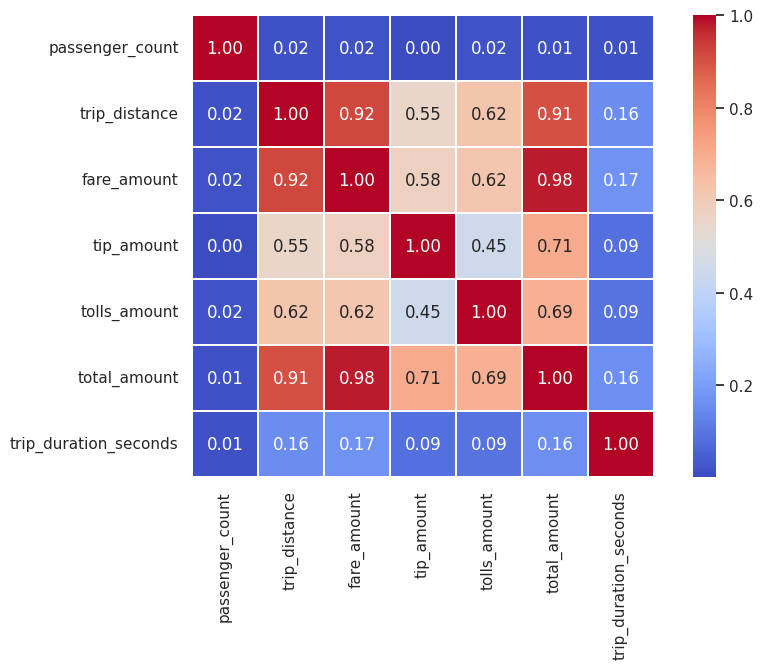

In [289]:
# Checking correlation between variables. 

numeric_df = df_ny[['passenger_count', 'trip_distance', 'fare_amount',
       'tip_amount', 'tolls_amount', 'total_amount', 'trip_duration_seconds']]

fig = plt.figure(figsize=(10, 6))
sns.set(font_scale=1)
sns.heatmap(numeric_df.corr(), cbar=True, annot=True, square=True,\
                 fmt='.2f',
                 annot_kws={'size': 12}, yticklabels=numeric_df.columns,\
                 xticklabels=numeric_df.columns, cmap = 'coolwarm',lw = .1)
plt.show() 

"The correlation between the numeric variables supports the visual assumptions. It appears to be a plausible explanation that the income in the taxi industry has increased due to relatively longer distances for each ride, rather than the duration. I speculate that this might be the case because longer distances can lead to lower duration due to quicker travel.



*Here, I realized that there are several trips with 0 distance and 0 duration (approximately 190), and there are also approximately 3000 trips with 0 distance and a duration of under a minute. I went back and removed them during the cleaning process because it is likely that these trips did not take place. Some of these trips also include a RateCodeID (99), which I believe signals an error, providing further justification for their removal. Additionally, there is a curious group of trips under 25 miles with durations over 20 hours. I decided to leave them as is since I don't have additional information, but it's definitely a group worth reviewing.*

Definitely, after correcting for the skewness and addressing some outlier distances and durations, the relationship between distance and duration appears to be better. Nevertheless, there is still a significant group of observations 'under the curve,' which might explain why trip duration is not as relevant as distance for the final amount paid.

But we need to account also for the inflation of the period. For this we will creat a constant USD varaible. 

/tmp/ipykernel_1089/1536387331.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['log_trip_distance'] = np.log(numeric_df['trip_distance'])
/tmp/ipykernel_1089/1536387331.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['log_trip_duration'] = np.log(numeric_df['trip_duration_seconds'])


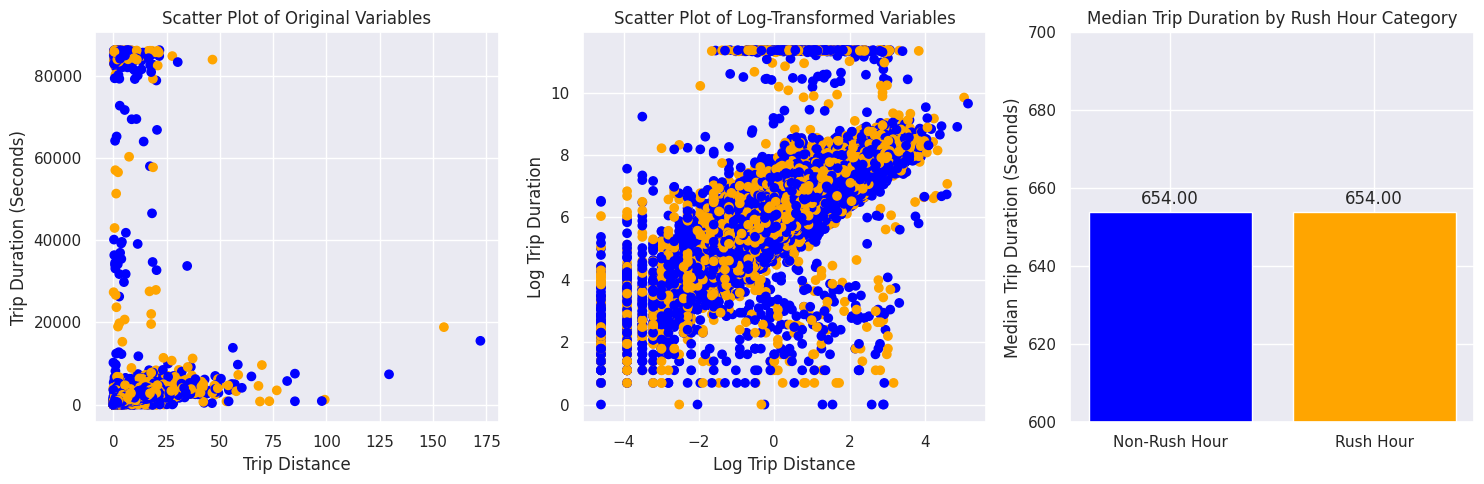

In [290]:
numeric_df = df_ny[['passenger_count', 'trip_distance', 'fare_amount',
       'tip_amount', 'tolls_amount', 'total_amount', 'trip_duration_seconds','rushhour_flag' ]]

# Log-transform 'trip_distance' and 'trip_duration'
numeric_df['log_trip_distance'] = np.log(numeric_df['trip_distance'])
numeric_df['log_trip_duration'] = np.log(numeric_df['trip_duration_seconds'])

# Create a color map based on the 'rushhour_flag' category variable
colors = np.where(numeric_df['rushhour_flag'], 'orange', 'blue')

# Plot the log-transformed variables with color
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot of original variables
ax1.scatter(numeric_df['trip_distance'], numeric_df['trip_duration_seconds'], c=colors)
ax1.set_xlabel('Trip Distance')
ax1.set_ylabel('Trip Duration (Seconds)')
ax1.set_title('Scatter Plot of Original Variables')

# Scatter plot of log-transformed variables
ax2.scatter(numeric_df['log_trip_distance'], numeric_df['log_trip_duration'], c=colors)
ax2.set_xlabel('Log Trip Distance')
ax2.set_ylabel('Log Trip Duration')
ax2.set_title('Scatter Plot of Log-Transformed Variables') 

# Bar chart of average trip duration for rush hour category
average_duration = numeric_df.groupby('rushhour_flag')['trip_duration_seconds'].median()
labels = ['Non-Rush Hour', 'Rush Hour']
bars = ax3.bar(labels, average_duration, color=['blue', 'orange'])
ax3.set_ylabel('Median Trip Duration (Seconds)')
ax3.set_title('Median Trip Duration by Rush Hour Category')
ax3.set_ylim(600,700)

# Add mean values as text annotations on top of the bars
for bar, mean_value in zip(bars, average_duration):
    ax3.annotate(f'{mean_value:.2f}', xy=(bar.get_x() + bar.get_width() / 2, mean_value),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()



*Here, I realized that there are several trips with 0 distance and 0 duration (approximately 190), and there are also approximately 3000 trips with 0 distance and a duration of under a minute. I went back and removed them during the cleaning process because it is likely that these trips did not take place. Some of these trips also include a RateCodeID (99), which I believe signals an error, providing further justification for their removal. Additionally, there is a curious group of trips under 25 miles with durations over 20 hours. I decided to leave them as is since I don't have additional information, but it's definitely a group worth reviewing.*

Definitely, after correcting for the skewness and addressing some outlier distances and durations, the relationship between distance and duration appears to be better. Nevertheless, there is still a significant group of observations 'under the curve,' which might explain why trip duration is not as relevant as distance for the final amount paid. Rush or no Rush Hour is mearly a 8 sec difference in avarage and no difference considering the median. 

## Analysis

### References and Resources:
*Many features were extracted from Chat GPT or the following repository in github*:
https://github.com/norberte/DS_professional_development/blob/master/DS%20interviews/NYC%20Yellow%20Taxi.ipynb

Time series CPI from :
https://fred.stlouisfed.org/series/CPIAUCSL#0

Library Instructions:
https://seaborn.pydata.org/generated/seaborn.pairplot.html